<a href="https://colab.research.google.com/github/seungbinahn/START_AI/blob/master/02_Machine_Learning/04_3_%EB%AA%A8%EB%8D%B8_%EC%84%B1%EB%8A%A5_%EC%B8%A1%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 성능 측정
* 모델 : 머신러닝에서 어떠한 문제를 해결하는 시스템
* 문제의 유형에 따라 성능을 측정할 수 있는 지표가 다름

1. Regression(회귀)
* x와 y값의 관계
* MSE : 정답과 예측 값 차의 제곱의 평균
* MAE : 정답과 예측 값 차의 절대값의 평균
* R Square, Adjusted R square

2. Classification(분류)의 성능 지표

## 2진 분류의 성능 지표



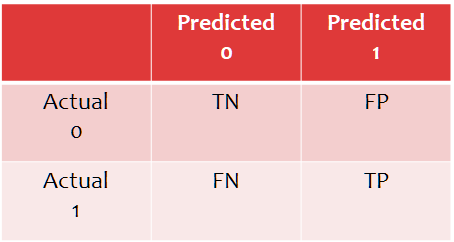

* P : Positive : 모델이 1로 예측
* N : Negative : 모델이 0으로 예측
* T : True : 예측이 맞음
* F : False : 예측이 틀림
----
* TN : True-Negative : 0으로 예측했더니 맞음
* TP : True-Positive : 1로 예측했더니 맞음
* FN : False-Negative : 0으로 예측했더니 틀림
* FP : False-Positive : 1로 예측했더니 틀림


### Accuracy : 정합도
* 전체 데이처 중에서 정답의 비율을 보여주는 지표
* 모델이 정답을 정답으로, 오답을 오답으로 선택하는 가를 보여주는 지표
* 전체 케이스 중에서 예측이 맞은 경우
* (tp+tn) / (fp+fn+tp+tn)

### Precision : 정밀도
* 모델에서 정답이 아닌것을 얼마나 잘 걸러 내는가
* tp / (tp+fp) 
* fp : 1로 예측해서 틀린 경우
* 모델의 참 예측 중에서 t의 비율
* Negative인 데이터를 Positive로 잘못 분류하면 업무상 영향이 큰 경우
* 스팸 메일 분류, 추천 시스템
* 스팸 메일의 경우 정상메일이 스팸으로 분류되면 확인하지 않으면 문제가 될 수있음
* 반면 스팸메일이 정상으로 분류되는 것은 큰 문제는 없음
* 진짜 1일 것 같은것만 뽑으면 Precision이 상승, Recall이 하락

### Recall : 재현율
* 모델에서 실제 정답을 얼마나 많이 선택하는 가를 보여주는 지표
* tp / (tp+fn)
* fn : 0으로 예측해서 틀린경우
* 실제의 참 중에서 p의 비율
* Test 데이터가 Positive인 데이터를 Negative로 잘못 하게 되면 업무상 영향이 큰 경우
* 보험사기, 금융사기, 어뷰징, 질병 검출
* 질병 검출의 경우 Positive로 해놓고, 나중에 정밀 검사를 통해 P,N을 판단하는게 나음
* 조금만 조건이 맞으면 1로 뽑으면 Recall이 상승, Precision이 하락

### Precision과 Recall
**recall과 precision은 trade-off 관계임**

## accuracy의 허점

In [1]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, X , y=None): 
        pass
    
    def predict(self, X):# 예측 함수
        pred = np.zeros( ( X.shape[0], 1 )) # 1차원 행렬 생성
        for i in range (X.shape[0]) : # 각 행에 따라 2진 분류
            if X['Sex'].iloc[i] == 1: # 남자는 사망
                pred[i] = 0
            else : # 여성은 생존
                pred[i] = 1
        
        return pred


In [2]:
# 전처리 함수
from sklearn.preprocessing import LabelEncoder

def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)
  
  return df

def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
  
  return df

def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin','Sex','Embarked']
  
  for feature in features:
    le=LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  
  return df

def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  
  return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('./train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Dummy Classifier의 정확도는: 0.7877


In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# 허점을 테스트 하기 위한 클래스
class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y): # fit으로 생성하는 모델은 없음
        pass
    
    # 예측을 하는것이 아니라 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST(필기체 데이터) 데이터 로딩 
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [5]:
# ndarray에 비교연산자를 사용한 불리언 추출
digits.target == 7

array([False, False, False, ..., False, False, False])

In [6]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
# n진 문제를 2진 문제로 변환
y = (digits.target == 7).astype(int)
print(y[:30])

X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]


In [7]:
# 불균형한 레이블 데이터 분포도 확인. 
print('y_test.shape :', y_test.shape)
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 했을 때 Accuracy:{:.3f}'.format(accuracy_score(y_test , fakepred)))
# 그저 0으로 출력했을 뿐인데 Accuracy가 0.9 로 예측됨
# 대상자 1000먕을 전부 암이 아니라고 해도 정합도는 90%

y_test.shape : (450,)
0    405
1     45
dtype: int64
모든 예측을 0으로 했을 때 Accuracy:0.900


## 혼동행렬

In [8]:
from sklearn.metrics import confusion_matrix

# 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix출력
# type here 27
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

## Precision과 Recall

In [9]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

# Accuracy가 굉장히 높지만, precision과 recall은 굉장히 낮음
print('precision :', precision_score(y_test, fakepred)) # 0%
print('recall :', recall_score(y_test, fakepred)) # 0%

precision : 0.0
recall : 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# 성능 지표 출력 함수
def get_clf_eval(y_test , pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test , pred)
  precision = precision_score(y_test , pred)
  recall = recall_score(y_test , pred)
  
  print('Confusion Matrixs')
  print(confusion)
  print('Accuracy: {0:.4f}, Presion: {1:.4f}, Recall: {2:.4f}'.format(accuracy , precision ,recall))

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_titanic = pd.read_csv('./train.csv')

df_y = df_titanic['Survived']

df_x = df_titanic.drop('Survived', axis=1)
df_x = transform_features(df_x)

scaler = StandardScaler() # 표준화를 위한 Scaler
df_x = scaler.fit_transform(df_x) # 표준화

x_train,x_test, y_train,y_test = train_test_split(df_x, df_y, test_size=0.20, random_state=11)

In [12]:
from sklearn.linear_model import LogisticRegression

# type here 31
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)

get_clf_eval(y_test, pred)

Confusion Matrixs
[[104  14]
 [ 13  48]]
Accuracy: 0.8492, Presion: 0.7742, Recall: 0.7869


## Precision - Recall Trade-off

In [13]:
# 정수형 결과
pred  = lr_clf.predict(x_test) 

# proba : probability 예측의 확률 계산 함수
# 0 1 정수형이 아닌 결과의 확률을 예측해줌
pred_proba = lr_clf.predict_proba(x_test) 
print('pred_proba.shape: ', pred_proba.shape)
print('pred_proba[:10]: \n', pred_proba[:10])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
# np.concatenate()
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('pred_proba_result[:10] \n',pred_proba_result[:10])
# 임계값이 0.5로 설정한 결과

pred_proba.shape:  (179, 2)
pred_proba[:10]: 
 [[0.4518945  0.5481055 ]
 [0.88278978 0.11721022]
 [0.88135283 0.11864717]
 [0.88486684 0.11513316]
 [0.85920243 0.14079757]
 [0.88448836 0.11551164]
 [0.89225389 0.10774611]
 [0.20126782 0.79873218]
 [0.7871673  0.2128327 ]
 [0.35672099 0.64327901]]
pred_proba_result[:10] 
 [[0.4518945  0.5481055  1.        ]
 [0.88278978 0.11721022 0.        ]
 [0.88135283 0.11864717 0.        ]
 [0.88486684 0.11513316 0.        ]
 [0.85920243 0.14079757 0.        ]
 [0.88448836 0.11551164 0.        ]
 [0.89225389 0.10774611 0.        ]
 [0.20126782 0.79873218 1.        ]
 [0.7871673  0.2128327  0.        ]
 [0.35672099 0.64327901 1.        ]]


In [14]:
# Binarizer의 활용
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# type 33
# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [15]:
# Binarizer와 pred_prob로 threshold 별 precision recall 확인
# Binarizer의 threshold 설정값. 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) # binarizer 생성
custom_predict = binarizer.transform(pred_proba_1) # 0과 1로 이진화

get_clf_eval(y_test, custom_predict) # 결과 비교

Confusion Matrixs
[[104  14]
 [ 13  48]]
Accuracy: 0.8492, Presion: 0.7742, Recall: 0.7869


In [16]:
# Binarizer와 pred_prob로 threshold 별 precision recall 확인
# Binarizer의 threshold 설정값. 분류 결정 임곗값임
custom_threshold = 0.4

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) # binarizer 생성
custom_predict = binarizer.transform(pred_proba_1) # 0과 1로 이진화

get_clf_eval(y_test, custom_predict) # 결과 비교

Confusion Matrixs
[[98 20]
 [11 50]]
Accuracy: 0.8268, Presion: 0.7143, Recall: 0.8197


* 임계값을 높이면 1을 더 보수적으로 선택, Presion이 올라가고 Recall이 떨어짐
* 임계값을 낮추면 1을 더 여유있게 선택, Presion이 떨어지고 Recall이 올라감

In [17]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)
        print('\n')

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
Confusion Matrixs
[[98 20]
 [11 50]]
Accuracy: 0.8268, Presion: 0.7143, Recall: 0.8197


임곗값: 0.45
Confusion Matrixs
[[102  16]
 [ 12  49]]
Accuracy: 0.8436, Presion: 0.7538, Recall: 0.8033


임곗값: 0.5
Confusion Matrixs
[[104  14]
 [ 13  48]]
Accuracy: 0.8492, Presion: 0.7742, Recall: 0.7869


임곗값: 0.55
Confusion Matrixs
[[109   9]
 [ 15  46]]
Accuracy: 0.8659, Presion: 0.8364, Recall: 0.7541


임곗값: 0.6
Confusion Matrixs
[[112   6]
 [ 15  46]]
Accuracy: 0.8827, Presion: 0.8846, Recall: 0.7541




임계값에 따라 Presion과 Recall이 서로 trade-off 관계를 가지고 변화함

### 실험 자동화

In [18]:
# precision-recall_curve() API
# Trade-off 시각화
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )

# 각 성능 지표의 ndarray의 shape
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape) # 143 등분된 threshold로 실험
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print('\n')

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

print('\n')

thr_index = np.arange(0, thresholds.shape[0], 15) # 값을 확인할 인덱스 선정
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)

print('\n')

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
반환된 precisions 배열의 Shape: (144,)
반환된 recalls 배열의 Shape: (144,)


thresholds 5 sample: [0.10030568 0.10030775 0.10033106 0.10278191 0.10513345]
precisions 5 sample: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.96721311]


샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]


샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.18 0.28 0.4  0.56 0.68 0.83 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.714 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.754 0.607 0.377 0.148]


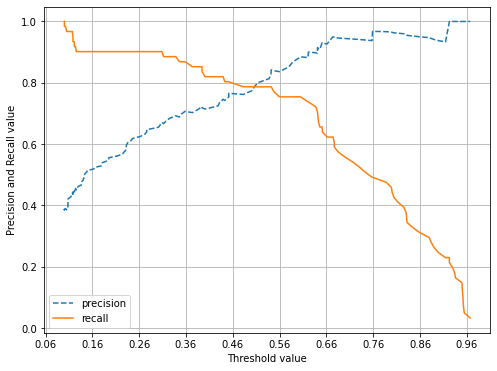

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(x_test)[:, 1] )

## F1 Score
* Precision, Recall을 결합한 지표
* Precision, Recall이 한쪽으로 치우치지 않을 때 높은 값을 보임
* f1_score(y_true, y_pred) API 사용

F1 = 2 * (precision*recall) / (precision + recall)

In [20]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: %.4f' % f1)

F1 스코어: 0.7805


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def get_clf_eval(y_test , pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test , pred)
  precision = precision_score(y_test , pred)
  recall = recall_score(y_test , pred)
  f1 = f1_score(y_test , pred)
  
  print('Confusion Matrixs')
  print(confusion)
  print('Accuracy:{0:.4f}, Presion:{1:.4f}, Recall:{2:.4f}, F1:{3:4f}​'.format(accuracy , precision ,recall, f1))


In [22]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba, thresholds):
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba)
    custom_predict = binarizer.transform(pred_proba)

    print('\nThreshold:',custom_threshold)
    get_clf_eval(y_test , custom_predict)


In [23]:
pred_proba = lr_clf.predict_proba(x_test)
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


Threshold: 0.4
Confusion Matrixs
[[98 20]
 [11 50]]
Accuracy:0.8268, Presion:0.7143, Recall:0.8197, F1:0.763359​

Threshold: 0.45
Confusion Matrixs
[[102  16]
 [ 12  49]]
Accuracy:0.8436, Presion:0.7538, Recall:0.8033, F1:0.777778​

Threshold: 0.5
Confusion Matrixs
[[104  14]
 [ 13  48]]
Accuracy:0.8492, Presion:0.7742, Recall:0.7869, F1:0.780488​

Threshold: 0.55
Confusion Matrixs
[[109   9]
 [ 15  46]]
Accuracy:0.8659, Presion:0.8364, Recall:0.7541, F1:0.793103​

Threshold: 0.6
Confusion Matrixs
[[112   6]
 [ 15  46]]
Accuracy:0.8827, Presion:0.8846, Recall:0.7541, F1:0.814159​
